# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 579


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | kachug
Processing Record 3 of Set 1 | avarua
Processing Record 4 of Set 1 | lihue
Processing Record 5 of Set 1 | nar'yan-mar
Processing Record 6 of Set 1 | utrik
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | belmonte
Processing Record 9 of Set 1 | puerto natales
Processing Record 10 of Set 1 | yeraliyev
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | longyearbyen
Processing Record 13 of Set 1 | tolanaro
Processing Record 14 of Set 1 | alaca
Processing Record 15 of Set 1 | vila franca do campo
Processing Record 16 of Set 1 | invercargill
Processing Record 17 of Set 1 | ust-nera
Processing Record 18 of Set 1 | atafu village
Processing Record 19 of Set 1 | fale old settlement
Processing Record 20 of Set 1 | vadso
Processing Record 21 of Set 1 | san antonio de pale
Processing Record 22 of Set 1 | ad

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          554
Lat           554
Lng           554
Max Temp      554
Humidity      554
Cloudiness    554
Wind Speed    554
Country       554
Date          554
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,38.26,61,99,20.42,TF,1714867657
1,kachug,53.9606,105.8817,54.05,59,85,1.01,RU,1714867658
2,avarua,-21.2078,-159.7750,84.25,79,75,8.05,CK,1714867507
3,lihue,21.9789,-159.3672,81.64,75,100,21.85,US,1714867440
4,nar'yan-mar,67.6713,53.0870,7.11,100,98,4.00,RU,1714867661


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

# Extract relevant fields from df
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,38.26,61,99,20.42,TF,1714867657
1,kachug,53.9606,105.8817,54.05,59,85,1.01,RU,1714867658
2,avarua,-21.2078,-159.7750,84.25,79,75,8.05,CK,1714867507
3,lihue,21.9789,-159.3672,81.64,75,100,21.85,US,1714867440
4,nar'yan-mar,67.6713,53.0870,7.11,100,98,4.00,RU,1714867661


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

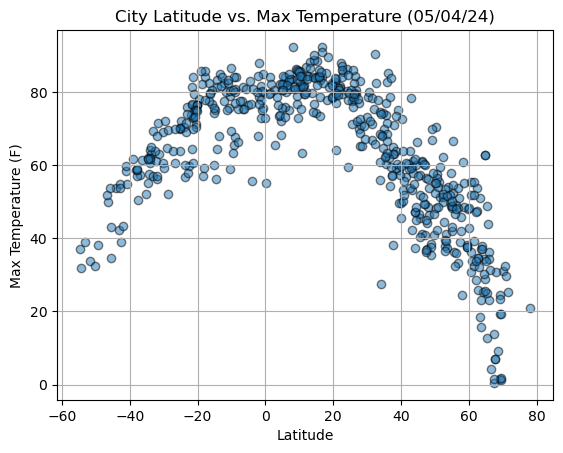

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(lats, max_temps, edgecolors="black", marker="o", alpha=0.5)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

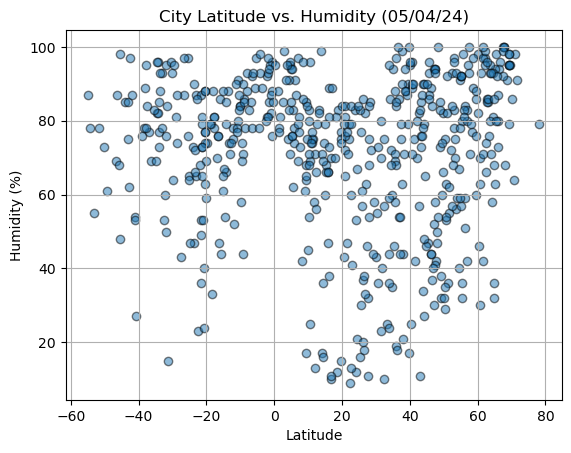

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(lats, humidity, edgecolors="black", marker="o", alpha=0.5)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Humidity ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

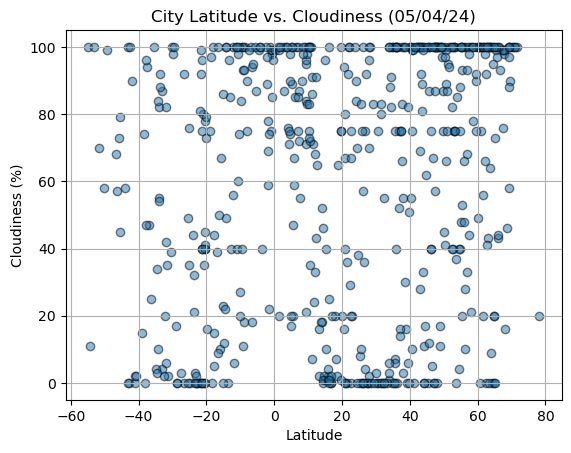

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(lats, cloudiness, edgecolors="black", marker="o", alpha=0.5)

# Incorporate the other graph properties
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

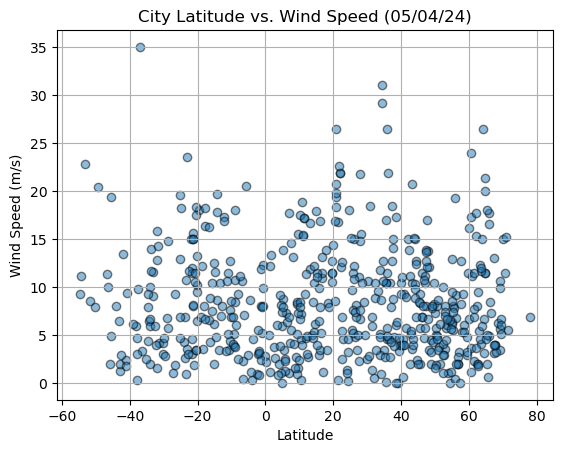

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(lats, wind_speed, edgecolors="black", marker="o", alpha=0.5)


# Incorporate the other graph properties
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%x')})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [25]:
# Define a function to create Linear Regression plots
def linregress_plot(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress = x * slope + intercept
    line_eq = (f"y = {round(slope,2)}x + {round(intercept,2)}")
    print(f"The r-value is: {rvalue}")
    plt.scatter(x, y, c="blue", marker="o", edgecolor="black", alpha=0.5)
    plt.plot(x,regress,"r")
    plt.annotate(line_eq,(x.min(),y.min()),color="r",fontsize=12)
    plt.tight_layout()

In [26]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0,:]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,kachug,53.9606,105.8817,54.05,59,85,1.01,RU,1714867658
3,lihue,21.9789,-159.3672,81.64,75,100,21.85,US,1714867440
4,nar'yan-mar,67.6713,53.0870,7.11,100,98,4.00,RU,1714867661
5,utrik,11.2278,169.8474,81.64,74,91,15.30,MH,1714867661
9,yeraliyev,43.2000,51.6500,59.49,73,92,3.58,KZ,1714867665


In [27]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] < 0,:]


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,38.26,61,99,20.42,TF,1714867657
2,avarua,-21.2078,-159.7750,84.25,79,75,8.05,CK,1714867507
6,grytviken,-54.2811,-36.5092,31.87,78,11,11.14,GS,1714867552
7,belmonte,-15.8631,-38.8828,76.86,86,10,7.49,BR,1714867663
8,puerto natales,-51.7236,-72.4875,33.93,78,70,8.57,CL,1714867664


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8618491571377417


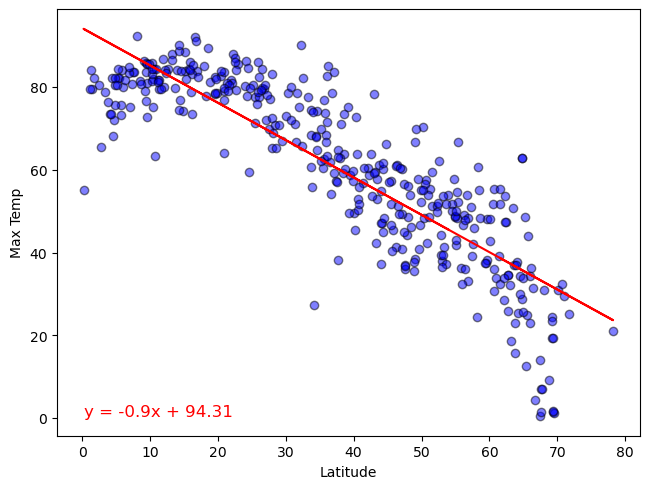

In [28]:
# Linear regression on Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

The r-value is: 0.8014565486329648


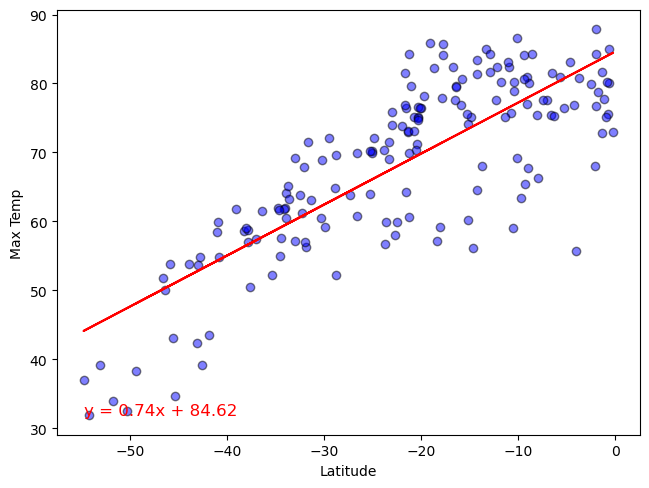

In [29]:
# Linear regression on Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])

plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

**Discussion about the linear relationship:** 
1. The northern hemisphere has a negative correlation, while the southern hemisphere has a positive correlation. 
2. Both suggest a strong correlation between the max temperature and the distance from the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.1612164888927581


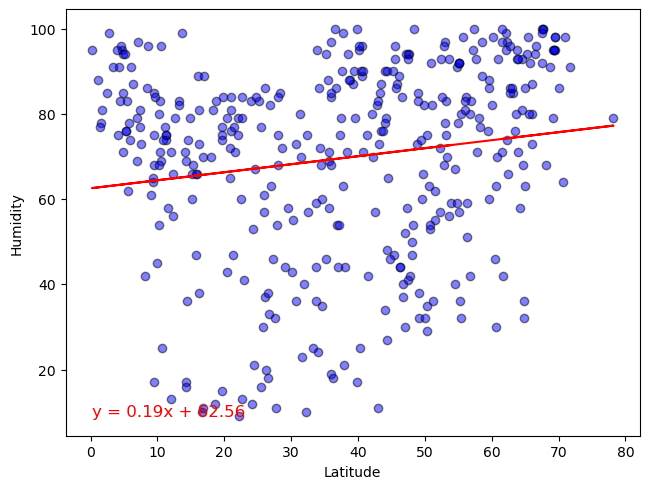

In [33]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

The r-value is: 0.1688078451464718


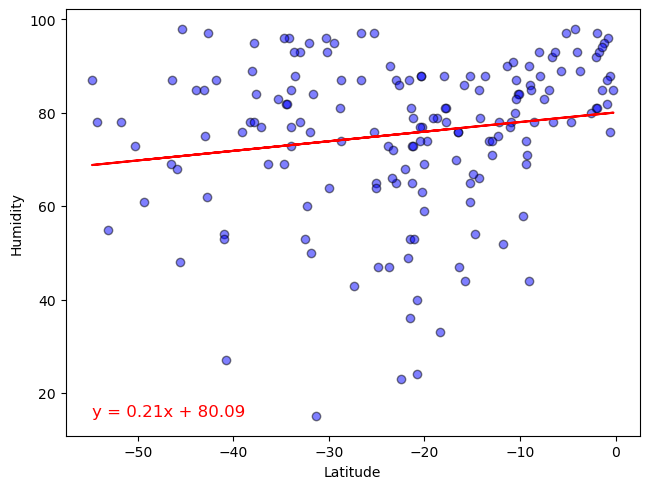

In [34]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])

plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

**Discussion about the linear relationship:** 
1. There is not much correlation between latitude and humidity.
2. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.15230354313443842


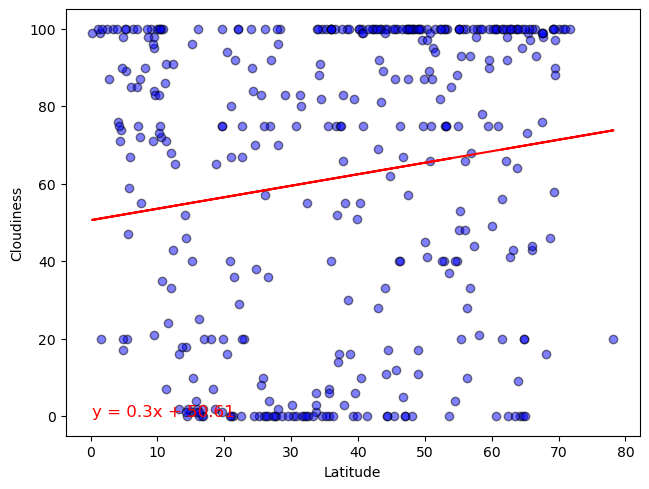

In [35]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

The r-value is: 0.22350054132690447


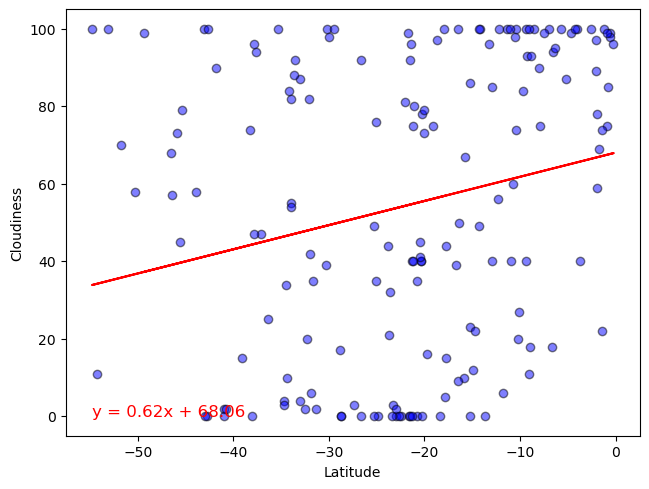

In [36]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

**Discussion about the linear relationship:**
1. There is also not much correlation between latitude and cloudiness
2. The northern hemisphere does have noticeably more cloud coverage then the southern hemisphere

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.02817337134786823


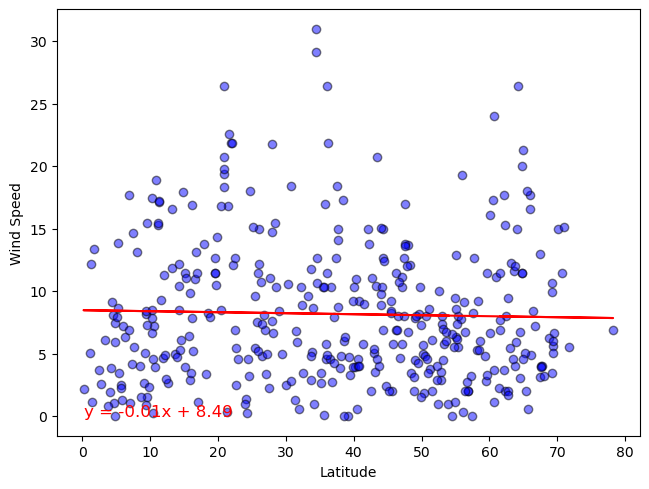

In [37]:
# Northern Hemisphere
linregress_plot(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

The r-value is: -0.09970884142983659


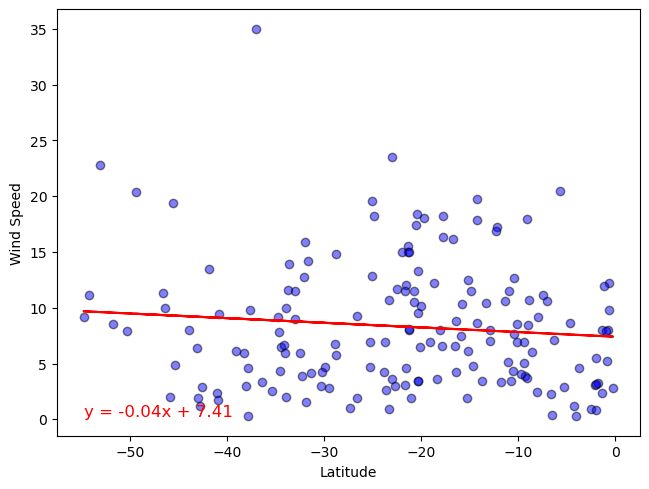

In [38]:
# Southern Hemisphere
linregress_plot(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

**Discussion about the linear relationship:** 
1. There also looks to be very little correlation between latitude and wind speed